# TD2 : K plus proches voisins et validation croisée


$$\newcommand{\esper}[2]{\mathbb{E}_{#1}\left[ #2 \right] }$$
$$\newcommand{\esperc}[3]{\mathbb{E}_{#1}\left[ #2 \ | \ #3 \right] }$$
$$\newcommand{\probc}[3]{\mathbb{P}_{#1}\left( #2 \ | \ #3 \right) }$$
$$\newcommand{\X}{\textbf{X}} % (X_1,X_2,...,X_n)$$
$$\newcommand{\Y}{\textbf{Y}} % (Y_1,...,Y_n)$$

## Partie théorique : Non-consistance de la règle du plus proche voisin.

Comme dit dans le titre nous allons chercher à démontrer que la règle du 1 plus proche voisin n'est pas consistante au sens vu dans le cours. Dans tout cet exercice, on appelle risque le risque au sens de Vapnik défini par $R(f) = \mathbb{E}[\ell(f(X), Y)]$.

**1 ) Rappelez la définition de la consistance d'une règle d'apprentissage de classifieur $\widehat{f}_n = \mathcal{A}(D_n)$ où $\widehat{f}_n: \mathbb{R}^d \longrightarrow \lbrace 0,1 \rbrace$.**

On dit qu'un règle d'apprentissage est consistante pour une distribution $\mathbb{P}_{X,Y}$ générant les données d'entrainement $D_n$ si on a :

$$\mathbb{E}_{D_n}{\mathcal{R}(\hat{f}_n}) \underset{n\rightarrow +\infty}{\longrightarrow} \min_{f\in\mathcal{F}} \mathcal{R}(f) =: \mathcal{R}(f^*) =: R^*$$

**Cadre de l'exercice** : On considère le cas de la classification binaire (le risque est donc le risque de la perte $0-1$) où l'on dispose d'un $n$-échantillon $D_n=(x_i,y_i)$ avec $\mathcal{X}=[0,1], \mathcal{Y}=\lbrace 0,1 \rbrace$. 

Ce $n$-échantillon est généré de manière i.i.d. comme suit:
les $x_i$ sont la réalisation (ou observation) de variables aléatoires $X_i$ suivant une certaine distribution $P$ admettant une densité $p$ par rapport à la mesure de Lebesgue sur $\mathcal{X}$. Les étiquettes $y_i$ sont la réalisation de variables aléatoires $Y_i$ distribuées en respectant $\forall x \in \mathcal{X},\eta(x)=\mathbb{P}(Y=1\vert X=x)=\alpha > \frac{1}{2}$.

A partir de ce $n$-échantillon, on construit un classifieur $\widehat{f}_n = \mathcal{A}(D_n)$. Il est important de garder à l'esprit que ce classifieur $\widehat{f}_n$ peut être vu comme la réalisation d'une variable aléatoire dépendant de $D_n = (X_1, \ldots, X_n, Y_1, \ldots, Y_n)$. Etudier la consistance de la régle de classification définie par $\widehat{f}_n$ revient à s'intéresser au comportement de la variable aléatoire $\widehat{f}_n$ quand $n$ tend vers l'infini.
\\

**2) En considérant la distribution des données décrite ci-dessus, donner l'expression du prédicteur de Bayes et le risque associé.**

Dans le cas de la classification binaire, puisque l'on identifie l'espace de sortie $\mathcal{Y}$ à $\lbrace 0,1 \rbrace$ il est usuel d'exprimer le prédicteur de Bayes comme une indicatrice, avec la notation $\eta(x)=\mathbb{P}(Y=1\vert X=x)$,
$$f^*=1_{\lbrace x\in\mathcal{X}, \eta(x) \geq 1/2\rbrace}$$

Avec un léger abus de notation on se permet d'écire que $\lbrace x\in\mathcal{X}, \eta(x) \geq 1/2\rbrace =: \lbrace \eta(x) \geq 1/2\rbrace $. En général on note donc $f^*= 1_{\lbrace \eta(x) \geq 1/2\rbrace}$.

Dans notre cas, comme la fonction $\eta(x)$ est constante et est plus grande que $1/2$ sur $\mathcal{X}$ le prédicteur de Bayes correspond tout simplement au prédicteur qui prédit la classe $1$ en tout point de $\mathcal{X}$. Le risque de Bayes est donc donné par :
%$$\mathbb{E}[1_{Y=0}]=1-\alpha.$$
$$\mathbb{E}_{Y}{1_{\lbrace Y=0\rbrace}}=1-\alpha.$$



**3) On commence par considérer un classifieur quelconque $f$ qui ne dépend pas a priori de l'echantillon d'apprentissage $D_n$.  Soit $X$ la variable aléatoire indépendante de $D_n$ qui intervient dans la définition du risque et qui correspond aux données de test. Montrer que le risque associé à $f$ peut s'exprimer comme (on remarquera qu'un classifieur binaire quelconque s'écrit $f(X)=1_{\lbrace f(X)=1 \rbrace}$): 
$$R(f)=\alpha-(2 \alpha -1)\mathbb{E}_{X}[f(X)].$$
**

On remarque que n'importe quel classifieur binaire $f$ peut s'écrire comme $1_{\lbrace f(x)=1 \rbrace}$. Gardant cette remarque en tête, on écrit la définition du risque 
\begin{eqnarray*}
R(f)&=&\mathbb{E}_{X,Y}{1_{\lbrace f(X)\neq Y \rbrace}} \nonumber \\
 &=&\mathbb{E}_{X,Y}{1_{\lbrace f(X)=1 \rbrace} 1_{\lbrace Y=0 \rbrace}+1_{\lbrace f(X)=0 \rbrace} 1_{\lbrace Y=1 \rbrace}} \nonumber \\
  &=&\mathbb{E}_{X,Y}{f(X)1_{\lbrace Y=0 \rbrace}+(1-f(X))1_{\lbrace Y=1 \rbrace}}\nonumber \\
  &=&\mathbb{E}_{X}\mathbb{E}_ {Y}[f(X)1_{\lbrace Y=0 \rbrace}+(1-f(X))1_{\lbrace Y=1 \rbrace} \mid X] \\
    &=&\mathbb{E}_{X}{f(X)(1-\eta(X))+(1-f(X))\eta(X)} \\
      &=&\alpha-(2 \alpha -1)\mathbb{E}_{X}{f(X)}
 \end{eqnarray*}.

**4) On considère maintenant le classifieur construit par la règle du plus proche voisin $\widehat{f}^1$, et on va démontrer qu'il n'est pas consistant.**

 **a) Montrer que chaque variable aléatoire $Y_i$ est indépendante  de $(X_1,\ldots, X_n)$ (on pourra se contenter d'une justification intuitive).**
 
 On a d'une part que comme les paires $(X_i,Y_i)$ sont iid :
$$\mathbb{P}(Y_i=1\vert\ X_1,\ldots,X_n) = \mathbb{P}(Y_i=1\vert\ X_i). $$
D'autre part comme la distribution conditionnelle des $Y$ sachant $X$ ne dépend pas de $X$ on a :
$$\mathbb{P}(Y_i=1\vert\ X_i) = \mathbb{P}(Y_i=1) = \alpha .$$

Finalement on a bien l'indépendance de $Y_i$ avec $(X_1,\ldots X_n)$.

**b)
En introduisant des variables $B_i(X)$ valant 1 si l'exemple $i$ de l'échantillon est le plus proche voisin de $X$ et 0 sinon, exprimez $\widehat{f}^1(X)$ comme une somme de variables aléatoires. **

Avec les notations introduites, on a que $\forall x, \hat{f}_1(x)=\sum^n_{i=1}B_i(x)Y_i$.  

*Remarque : il est naturel de se demander comment faire en pratique lorsqu'un point des données sur lesquelles on teste le classifieur est à égale distance de deux points d'apprentissage. Dans le formalisme de cet exercice, comme les variables ont une densité cela ne peut arriver qu'avec une probabilité nulle. En revanche, dans un contexte plus général, il est possible d'avoir avec une probabilité non nulle une nouvelle observation équidistante de deux points d'apprentissage. Plusieurs stratégies sont possibles: attribuer aléatoirement à la nouvelle observation le label de l'un ou l'autre des points dont elle est équidistant ou encore attribuer le label de l'observation de plus faible indice.*



**c) Quelle est l'espérance de $Y_i$ conditionnellement à $(X_1,\ldots, X_n)$? Donnez l'expression de l'espérance de $\widehat{f}^1$ conditionnellement aux $(X_1, \ldots X_n)$ (l'espérance est prise par rapport à $X$ et aux $Y_i$).**

Pour la suite on note $\X=(X_1,\ldots,X_n)$ et $\Y=(Y_1,\ldots,Y_n)$.
 L'espérance de $Y_i$ conditionnelement à $\X$ est simplement l'espérance de $Y_i$ grâce à l'indépendance prouvée précédement.
 Or, l'espérance des $Y_i$ vaut $\alpha$ (en écrivant $\mathbb{E}[Y_i]=\mathbb{P}(Y_i=1)=\mathbb{E}_X[\mathbb{P}(Y_i=1 | \ X)]=\alpha$). 
 
 On a alors :

\begin{eqnarray*}
\esperc{X,\Y}{\hat{f}_1(X)}{\X} &=&  \esperc{X,\Y}{\sum^n_{i=1}B_i(X)Y_i}{\X} \nonumber \\
 &=& \sum^n_{i=1}\esperc{X,\Y}{B_i(X)Y_i}{\X} \nonumber \\
  &=& \sum^n_{i=1}\esperc{X}{B_i(X)}{\X}\esperc{\Y}{Y_i}{\X}    \text{ (indépedance de $B_i(X)$ avec $Y_i$ sachant $\X$)} \\
  &=&  \sum^n_{i=1}\esperc{X}{B_i(X)}{\X}\alpha \nonumber \\
    &=&  \alpha \esperc{X}{\sum^n_{i=1}B_i(X)}{\X} \\
      &=& \alpha
 \end{eqnarray*}.

**5) Donner le risque de $\widehat{f}^1$ et en déduire que la méthode des $1$-ppv n'est pas consistante.**

On a donc $\esper{D_n}{\esperc{X}{\hat{f}_1}{D_n}} = \alpha $. 
Ainsi on a $\esper{D_n}{\mathcal{R}(\hat{f}_1)}=\alpha-(2\alpha-1)\alpha=2\alpha(1-\alpha)$. 
Comme $\alpha > 1/2$, le risque de la méthode des 1-ppv est strictement supérieur au risque de la fonction cible pour tout $n$. La méthode n'est donc pas consistante pour la distribution considérée. Elle n'est donc pas universellement consistante.

**6) On considère maintenant toujours le problème de classification binaire sur $\mathcal{X}$ avec le classifieur $\widehat{f}^K$ des $K$ plus proches voisins. Pour s'affranchir de certaines difficultés, on va supposer que $K$ est impair.**

**a) En vous inspirant du raisonnement précédent montrer que le risque du classifieur $\widehat{f}^K$ des $K$ plus proches voisins, conditionné sur les données d'entrainement $(X_1, \ldots X_n)$ (donc l'espérance du risque de $\widehat{f}^K$ pris par rapport aux seuls $Y_i$) peut s'exprimer en fonction de la probabilité pour une variable binomiale $U$ de paramètres $K$ et $\alpha$ d'être plus grande que $\frac{K}{2}$ (On rappelle que $U$ est une variable aléatoire binomiale de paramètre $\alpha$ et $K$ si $U$ peut s'écrire comme la somme de $K$ variables de Bernoulli de paramètre $\alpha$).**


 Soit un $n$-échantillon. On introduit la notation $\mathcal{V}_k(x)$ comme étant les indices des $k$ plus proches voisins de $x$ dans l'ensemble d'entrainement (voisinage de $x$ au sens des $k$ plus proches voisins). On peut alors écrire que :

$$\forall x \in \mathcal{X}, \ \hat{f}_k = 1_{\lbrace\hat{\eta}_k(x)\geq 1/2\rbrace} \text{ où } \hat{\eta}_k(x) = \frac{1}{k}\sum_{i\in\mathcal{V}_k(x)} Y_i $$

On a alors que :

\begin{eqnarray*}
\esperc{X,\Y}{\hat{f}_k(X)}{\X} &=&  \esperc{X,\Y}{1_{\lbrace\hat{\eta}_k(x)\geq 1/2\rbrace}(X)}{\X} \nonumber \\
 &=& \probc{X,\Y}{ \hat{\eta}_k(X)\geq 1/2}{\X} \nonumber \\
  &=&\probc{X,\Y}{ \frac{1}{k}\sum_{i\in \mathcal{V}_k(X)}Y_i\geq \frac{1}{2}}{\X} \nonumber \\
  &=&  \probc{X,\Y}{ \sum_{i\in \mathcal{V}_k(X)}Y_i \geq \frac{k}{2}}{\X} \\
    &=&  \esper{\X}{\probc{\Y}{\sum_{i\in \mathcal{V}_k(X)}Y_i \geq \frac{k}{2}}{\X ,X}} \\
      &=& \esper{\X}{\beta} \text{(Voir justification plus bas)} \\
      &=& \beta,  
 \end{eqnarray*}.

où $\beta$ est simplement la probabilité  pour une variable binomiale $U$ de paramètre $k$ et $\alpha$ d'être plus grande que $\frac{k}{2}$. Une fois $X$ fixée à un certain $x$, la somme des $Y_i$ sur les indices de ce voisinage se comporte simplement comme une somme de $k$ Bernouilli de paramètre $\alpha$. Ceci justifie le passage à l'avant dernière ligne. Cette probabilité est une certaine constante positive qui ne dépend que de $k$, le nombre de plus proches voisins considérés..

**b) Montrer que l'espérance du risque associé au classifieur des $K$ plus proches voisins dans ce cas est strictement plus grand que le risque de Bayes $1-\alpha$. On pourra remarquer que l'espérance de $\widehat{f}^K$ est strictement plus petite que 1 par ce qui précède.**

Le risque du classifieur des $k$ plus proches voisins vaut donc simplement $\alpha-(2\alpha-1)\beta$. Ce risque ne dépend ni de $\X$, ni de $n$. Or ce risque est strictement plus grand que le risque de Bayes $1-\alpha$. On en déduit que la méthode des $k$ plus proches voisins n'est pas consistante si le nombre de voisins est fixé indépendemment de la taille de l'échantillon.

**Morale de l'histoire**
De manière plus générale, il n'y a pas de choix universellement consistant du nombre de plus proches voisins, valable indépendamment du nombre de points dans l'ensemble d'entraînement. En revanche, il est possible de vérifier (en exercice à la maison par exemple) que si on considère une suite d'entiers $k_n$ telle que $\lim_{n\rightarrow \infty} k_n = \infty$ et $\lim_{n\rightarrow \infty} k_n/n = 0$ alors les hypothèses du théorème de Stone sont vérifiées pour toutes les distributions. Ainsi pour la suite de règles des $k_n$ plus proches voisins, on a la consistance universelle.*


## Implémentation : K plus proches voisins et validation croisée

Pour ce TP on va utiliser des données réelles : des chiffres manuscrits, que vous pouvez télécharger sur la page web du cours.

Pour la classification avec $K$ classes, on appelle souvent matrice de confusion associée à des données $D_n=(x_t,y_t)$ la matrice $M \in \mathbb{N}^{K \times K}$ telle que $M_{i,j}$ soit le nombre d'éléments dont la vraie classe soit $i$ et dont la classe prédite par le classifieur $g$ soit $j$.

**NB**: Etant donné qu'il y a plus de $66000$ images dans le jeu de données, on va travailler avec un sous ensemble de ces $66000$ images afin de ne pas dépasser la mémoire disponible de votre ordinateur.

**1) Commencez donc par reprendre contact avec les données. Elles sont composées d'un vecteur de labels `y` et d'images 28 pixels par 28 sous forme d'une matrice `x` de vecteurs linéarisés (chaque ligne de la matrice `x` correspond à une image).**

**a) Mettez quelques images sous forme matricielle avec `reshape` et affichez les.**

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
%matplotlib inline

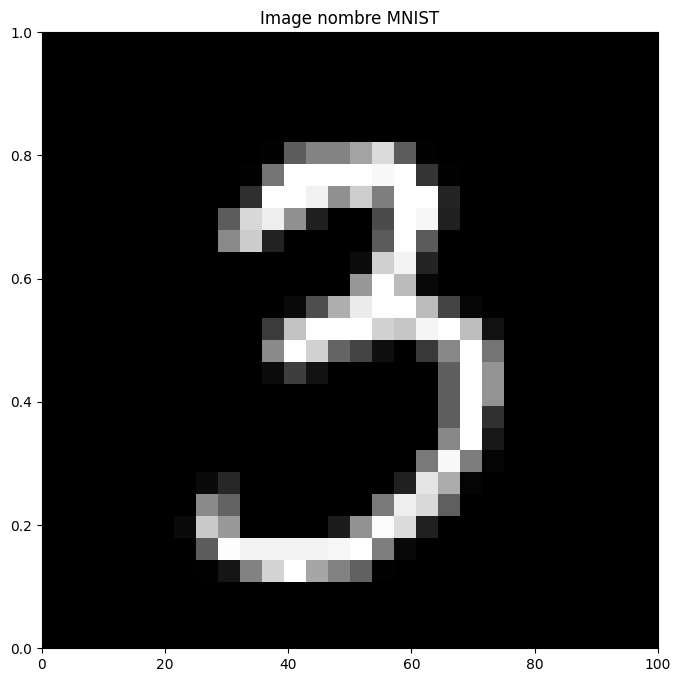

In [5]:
# Chargement des données
data = sio.loadmat('../TD_SGD/mnist_digits.mat')
X_total = np.array(data['x'])
Y_total = np.array(data['y'])
n_total = X_total.shape[0]

# Affichage d'une image
ind_im = 20000
im = X_total[ind_im,:].reshape((28, 28))

fig, (ax1) = plt.subplots(nrows=1, figsize=(8,8))
ax1.set_title('Image nombre MNIST')
ax1.imshow(im, extent=[0,100,0,1], aspect=100, cmap='gray')

**b) Sélectionnez $6000$ images au hasard dans le jeu de données.**

In [6]:
n = 6000
perm = np.random.permutation(n_total)
X_perm = X_total[perm]
Y_perm = Y_total[perm]
X_small = X_perm[:n]
Y_small = Y_perm[:n]

**c) Séparez les images en deux parties (dans les proportions $1/3,2/3$ par exemple) : un ensemble d'entraînement et un ensemble de test.**

In [7]:
alpha = 1/3
n_train = int(n*alpha)
n_test = n-n_train
X_train = X_small[:n_train] 
X_test = X_small[n_train:]
Y_train = Y_small[:n_train]
Y_test = Y_small[n_train:]

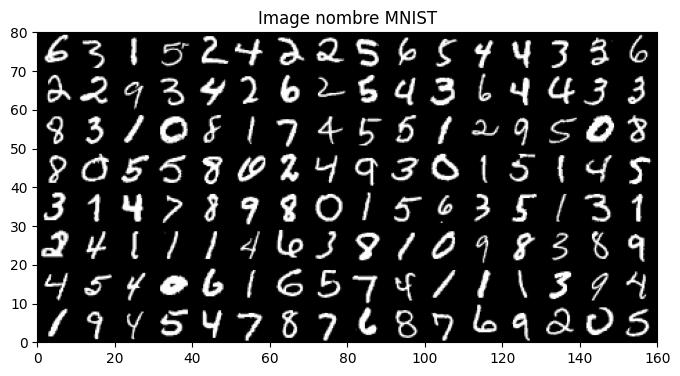

In [8]:
# affichage de plusieurs numéros de la base de donnée
X_display = X_train[:128,:].T
test = np.reshape(X_display, (28,28,128))

DISPLAY = np.zeros([8*28, 16*28, 1])
size_h = 28
size_w = 28
for i in range(128):
    DISPLAY[i//16*size_h:(i//16+1)*size_h, i % 16 * size_w: (i % 16 +1) * size_w, 0] = test[:,:,i]

fig, (ax1) = plt.subplots(nrows=1, figsize=(8,8))
ax1.set_title('Image nombre MNIST')
ax1.imshow(DISPLAY[:,:,0], extent=[0,160,0,80], aspect='equal', cmap='gray')

**2) On va maintenant implémenter la règle de classification par plus proches voisins. Pour cela, vous pourrez avoir besoin de la fonction `cdist` du module `scipy.spatial.distance`. Cette fonction permet, étant donné deux matrices de design de calculer les distances euclidiennes au carré entre les points.**

**a) Ecrivez une fonction qui prenne en entrée le nombre de plus proches voisins désirés, les données d'entrainement et les données de test et ressorte la matrice de confusion sur l'ensemble de test.**

In [9]:
# Calculs importants et lourd (à faire une seule fois)
from scipy.spatial.distance import cdist

dist_test_train = cdist(X_test, X_train, 'euclidean')
dist_train_train = cdist(X_train, X_train, 'euclidean')
ind_dist_test_train = np.argsort(dist_test_train, axis=1)
ind_dist_train_train = np.argsort(dist_train_train, axis=1)

In [16]:
# Question 8.a)
# Ici on triche un peu et on utilise la fonction scikit learn 
# pour calculer la matrice de confusion
from sklearn.metrics import confusion_matrix

def get_confusion(ind_dist_test_train, Y_test, Y_train, k):
    P = np.squeeze(Y_train[ind_dist_test_train[:, :k]])
    if k==1:
        Y_hat = P
    else:
        Y_hat, _ = stats.mode(P, axis=1,keepdims=True)
    return confusion_matrix(Y_test, Y_hat)
       
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrice de confusion',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix, avec normalisation")
    else:
        print('Confusion matrix, sans normalisation')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vrai label')
    plt.xlabel('Label predit')

Confusion matrix, sans normalisation


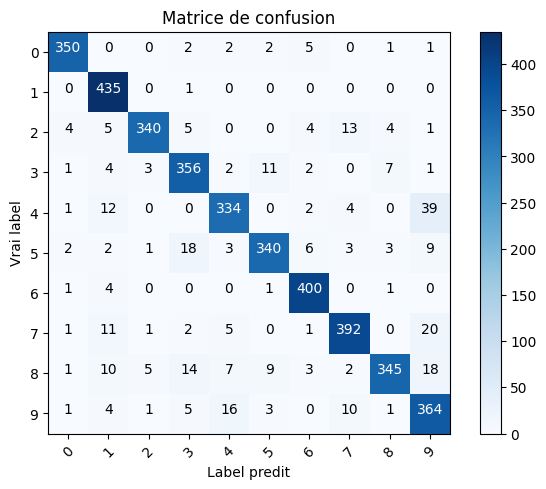

In [17]:
# Affichage d'une matrice de confusion
k = 1
conf_test = get_confusion(ind_dist_test_train, Y_test, Y_train, k)
plot_confusion_matrix(conf_test, range(10))

**b) Affichez l'erreur de classification sur les ensembles d'entraînement et de test en fonction du nombre de $k$, nombre de plus proches voisins pris en compte (attention la complexité est décroissante avec le nombre de voisins pris en compte). Vous pouvez faire varier $k$ entre 1 et 20 par exemple.**

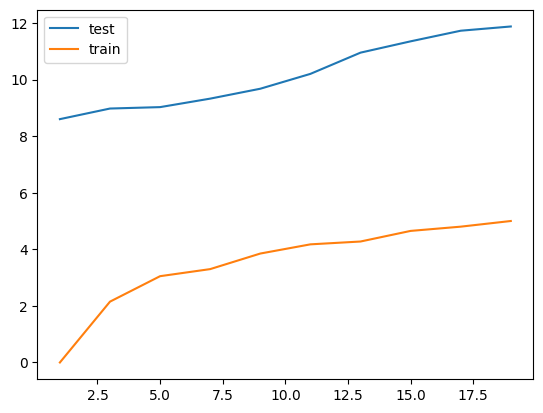

In [18]:
K_max = 20
err_test = []
err_train = []
# Faire la boucle uniquement sur les nombres impairs
for k in np.arange(1,K_max,2):
    conf_test = get_confusion(ind_dist_test_train, Y_test, Y_train, k)
    err_test.append((100.*(n_test-np.trace(conf_test))) / n_test)
    conf_train = get_confusion(ind_dist_train_train, Y_train, Y_train, k)
    err_train.append((100.*(n_train-np.trace(conf_train))) / n_test)

plt.plot(np.arange(1,K_max,2),err_test, label='test')
plt.plot(np.arange(1,K_max,2),err_train, label='train')
plt.legend()

**c) Séparez votre ensemble d'entraînement en un ensemble d'entraînement réduit et un ensemble de validation (on appelle en général cette technique la validation simple). En utilisant le code précédent, écrivez une fonction qui va utiliser l'ensemble de validation pour sélectionner le meilleur paramètre nombre de voisins $k$ au sens du nombre d'erreurs commises sur l'ensemble. **

In [24]:
n_fold = 5
K_max = 20
K_range = np.arange(1, K_max, 2)
# Création des différents folds
ind_fold = np.floor(n_fold*np.random.rand(n_train))
err_val_fold = np.zeros([n_fold, len(K_range)])

for f in range(n_fold):
    print("Fold %d sur %d" % (f, n_fold))
    X_train_cv = X_train[ind_fold != f, :]
    Y_train_cv = Y_train[ind_fold != f, :]
    X_val_cv = X_train[ind_fold == f, :]
    Y_val_cv = Y_train[ind_fold == f, :]
    n_val = np.size(Y_val_cv)
    # Preprocessing
    dist_val_train = cdist(X_val_cv, X_train_cv, 'euclidean')
    ind_dist_val_train = np.argsort(dist_val_train, axis=1)
    for i, k in enumerate(K_range):
        conf_val = get_confusion(ind_dist_val_train, Y_val_cv, Y_train_cv, k)
        err_val_fold[f, i] = (100. *(n_val-np.trace(conf_val))) / n_val

# Resultat de la validation croisée 
average_err_on_folds = np.mean(err_val_fold, axis=0)
k_select = K_range[np.argmin(average_err_on_folds)]
print('Erreur moyenne sur les sous ensembles:\n')
print(average_err_on_folds)
print("\n******************\n k choisi = %d \n******************\n" % k_select)


Fold 0 sur 5
Fold 1 sur 5
Fold 2 sur 5
Fold 3 sur 5
Fold 4 sur 5
Erreur moyenne sur les sous ensembles:

[ 9.02558118  9.84020522  9.77180261 10.44829436 10.51346598 10.71652545
 11.10100556 12.05265117 13.02622785 13.76588601]

******************
 k choisi = 1 
******************



**d) Séparez plusieurs fois de manière aléatoire votre ensemble d'entraînement. L'estimateur du nombre de plus proches voisins est il stable ? **

**3) On souhaite désormais sélectionner le nombre de plus proches voisins optimal par validation croisée. 
Vous allez, en utilisant les données d'entraînement implémenter la technique de la K-fold validation croisée pour K=8.
Faites le partitionnement des données d'entraînement plusieurs fois de manière aléatoire et regardez le comportement du nombre de plus proches voisins sélectionné. Que remarquez vous ?**